In [1]:
import pandas as pd

DATADIR = '../data/'
FILENAME = 'main_data.csv'

In [2]:
df = pd.read_csv(DATADIR + FILENAME)
df

,Block#,GasUsed,GasUsedInvalid,TotalTxs,InvalidTxs,GasWasted
0,9168942.0,9969353,60000,124,1,31935
1,8619480.0,9929575,76930,42,1,50997
2,8619485.0,9929001,491186,92,3,413387
3,8619491.0,9921438,204320,31,1,177095
4,8619514.0,9935118,36452,37,1,12577
...,...,...,...,...,...,...
27771,8673317.0,9966050,33000,173,1,7710
27772,8673439.0,1685791,36452,37,1,12577
27773,9168860.0,9947405,414256,140,2,368274
27774,9168861.0,9948935,4233220,170,1,66780


In [3]:
df = df[df['InvalidTxs'] != 0]
df['WastePerc'] = (df['GasWasted'] / df['GasUsed']) * 100

<ipython-input-3-bd8f0e9c3482>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WastePerc'] = (df['GasWasted'] / df['GasUsed']) * 100


In [4]:
df.sort_values(by=['GasWasted'])

,Block#,GasUsed,GasUsedInvalid,TotalTxs,InvalidTxs,GasWasted,WastePerc
19743,8569290.0,8064324,891480,27,1,0,0.000000
20156,8569865.0,8023865,873304,124,1,2,0.000025
18075,8595325.0,9982142,31242,73,1,2,0.000020
19220,8568576.0,8016769,2564488,72,3,3,0.000037
17956,3989186.0,665333,8000,19,1,4,0.000601
...,...,...,...,...,...,...,...
3872,8661636.0,9993885,9490724,14,1,9467392,94.731849
25803,9167991.0,9957560,9493729,5,1,9469283,95.096419
4321,8667972.0,9743768,9495461,3,1,9472065,97.211520
3807,8660907.0,9956372,9500000,14,1,9476269,95.177932


In [5]:
df['GasUsed'].mean()


9561223.187191183

In [6]:
df['GasWasted'].mean()


252599.59625617636

In [7]:
df['WastePerc'].mean()

2.750443755227139

array([[<AxesSubplot:title={'center':'WastePerc'}>]], dtype=object)

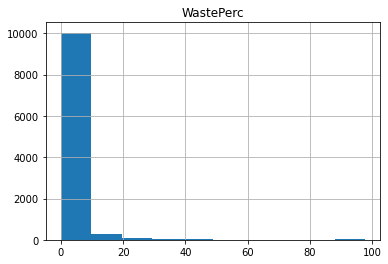

In [8]:
df.hist(column='WastePerc')

<ipython-input-9-306537b140b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GasUsed_M_GasWasted'] = df['GasUsed'] - df['GasWasted']


<AxesSubplot:ylabel='Gas Wasted by INVALID OPcode'>

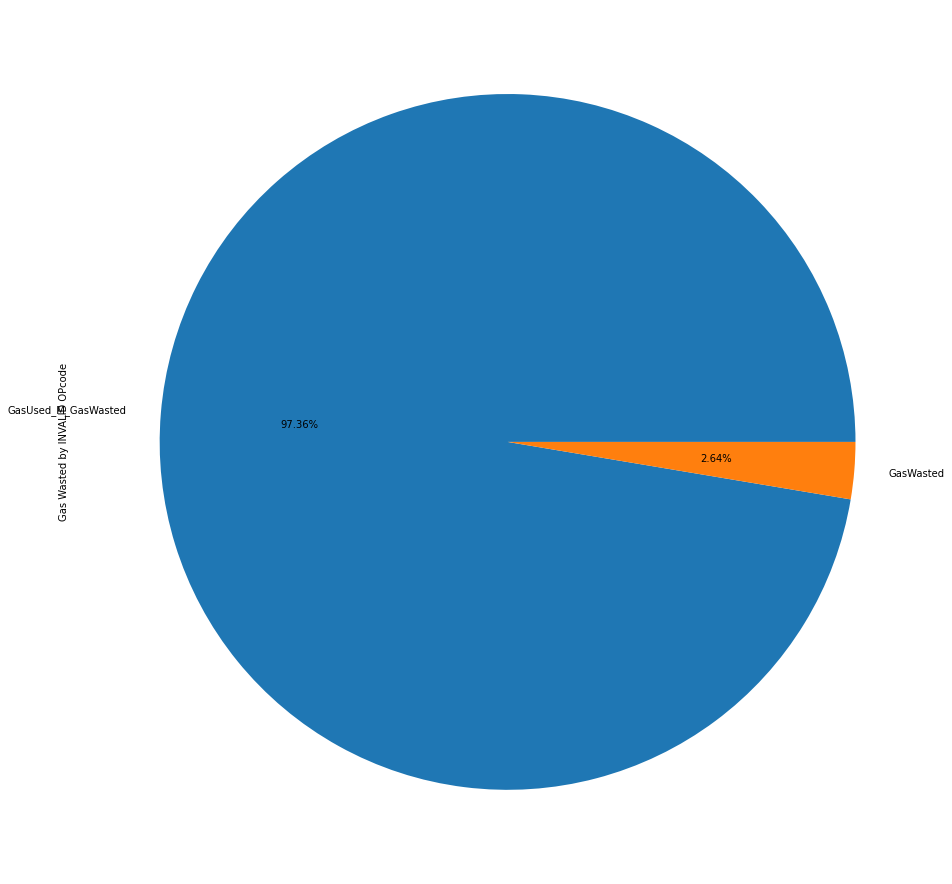

In [9]:
def autopct(pct):
    return ('%.2f' % pct) + "%" if pct > 0 else ''
df['GasUsed_M_GasWasted'] = df['GasUsed'] - df['GasWasted']
df[['GasUsed_M_GasWasted', 'GasWasted']].sum().plot(kind='pie', label='Gas Wasted by INVALID OPcode', figsize=(16,16), autopct=autopct)